In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

### Step 1: Load and inspect the dataset 

Here I am loading in the dataset and inspect it to understand the structure and contents. This is IBM's sample dataset named "Telco Customer Churn." 

In [59]:
# Load in the dataset
url="https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

data = pd.read_csv(url)

# Understanding the data set.
print(data.head())
print(data.info())
print(data.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### Step 2: Cleaning the data

First, I am dropping the Customer ID. This won't be useful in making a prediction. Next, I am handling the missing values in the ***TotalCharges*** column by converting it to a numeric value and filling in the missing values w/ the median.

In [60]:
# Dropping irrelevant columns (CustomerID doesn't help for prediction)
data = data.drop(columns=["customerID"])

# Handling missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

/var/folders/lg/zjtzqdq15v77l_2rk_z7jhwh0000gn/T/ipykernel_44164/1584422433.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


### Step 3: Exploratory Data Analysis (EDA)

Here I am visualizing the target variable (***Churn***) distribution.

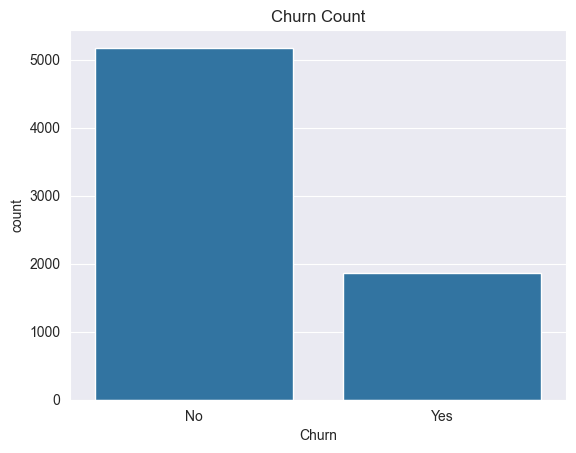

In [61]:
# Visualizing churn count
sns.countplot(x="Churn", data=data)
plt.title('Churn Count')
plt.show()

### Step 4: Data Preprocessing

In this step, I have encoded the categorical variables using ***LabelEncoder***, split the data into training & testing sets, standardized the features to ensure that the model can perform well w/ numerical values in the same range and I'm checking the feature correlations using a heatmap.

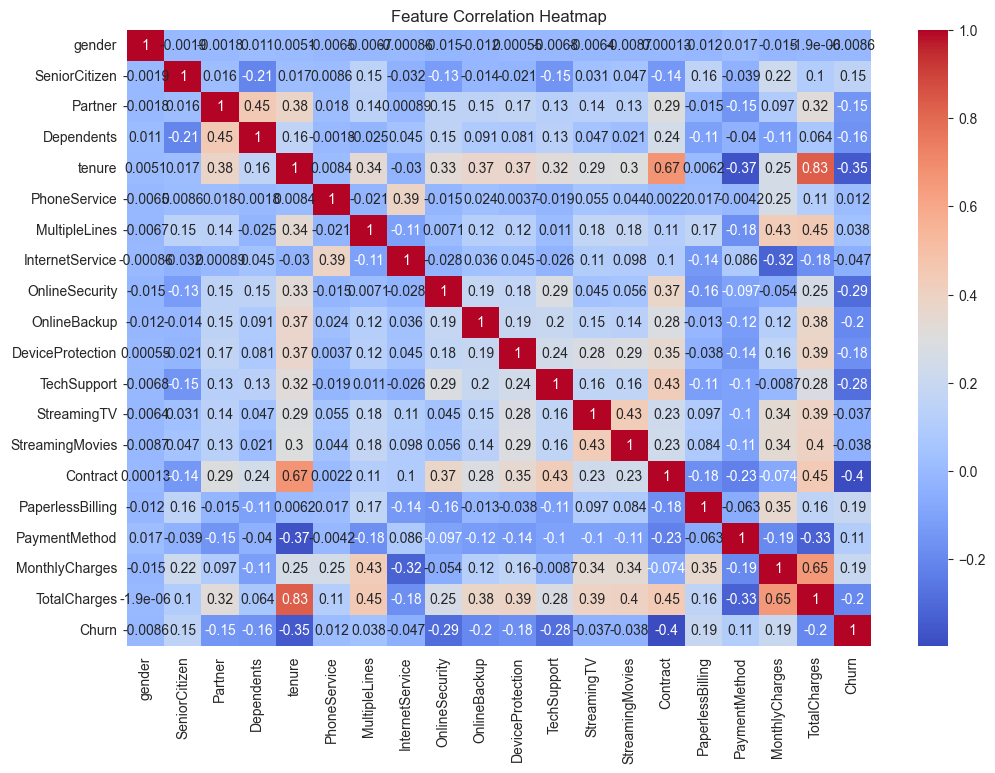

In [62]:
# Label encoding for categorical columns
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Feature-target split
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Step 5: Model Building (Logistic Regression)

Here I am building two models. A ***Logistic Regression*** model and a ***Random Forest Classifier***.

In [63]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 6: Model Evaluation (Logistic Regression)

In this step, I am evaluating the performance of both models using accuracy, confusion matrix, and classification report. I am also plotting ROC curve for logistic regression to evaluate model performance.

Logistic Regression Accuracy:  0.815471965933286
[[933 103]
 [157 216]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



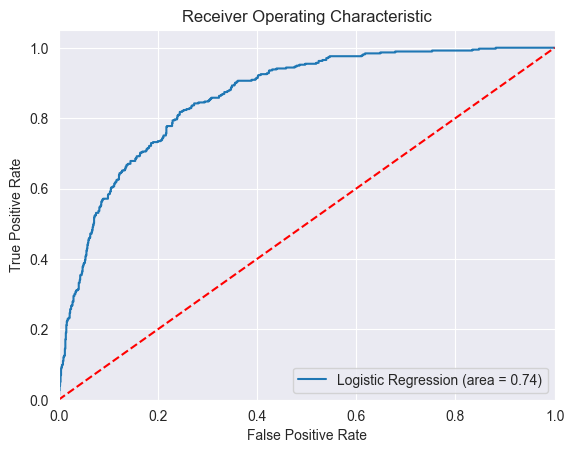

Random Forest Accuracy:  0.7963094393186657
[[946  90]
 [197 176]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [64]:
# Logistic Regression
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ROC Curve and AUC for Logistic Regression
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

### Key Findings

1. ***Churn Distribution***: Approximately 27% of customers in the dataset have churned, indicating an imbalanced dataset.


2. ***Correlation Analysis***:
- Tenure has a negative correlation with churn (−0.35), meaning customers who stay longer are less likely to churn.
- Contract Type shows a strong negative correlation with churn (−0.40), indicating that customers with longer contracts are less likely to leave.
- Monthly Charges and Total Charges have a weaker positive correlation with churn, suggesting that higher-paying customers are more likely to churn.

3. ***Model Performance***:
- Logistic Regression had an accuracy of 81.5% and an ROC AUC score of 0.74, performing slightly better than the Random Forest model.
- Random Forest achieved 79.6% accuracy, but its recall for predicting churn was lower.

### Conclusion

- Logistic Regression outperformed Random Forest in predicting customer churn, possibly due to its simpler structure handling the imbalanced data better.
- Tenure and Contract Type are strong predictors of churn, indicating that longer-term contracts and increased customer loyalty can reduce churn.
- There is room to improve performance by addressing class imbalance, applying hyperparameter tuning, and experimenting with more advanced models like XGBoost.